# MNIST digits classification dataset
https://keras.io/api/datasets/mnist/

In [2]:
!python --version

Python 3.9.6


In [3]:
import tensorflow as tf

/Users/mrc/project/learningml/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
(X,y),(X_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(X.shape,y.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


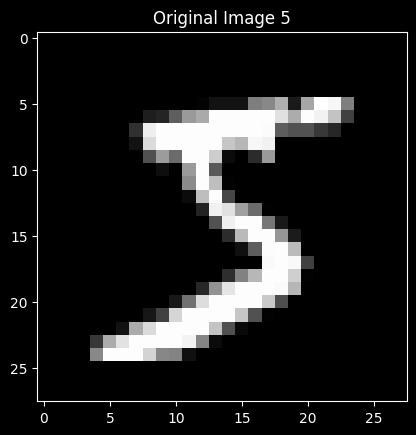

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap='gray')
plt.title(f"Original Image {y[0]}")
plt.show()

In [7]:
# 归一化
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
X_norm = norm_l(X)

print(X_norm.shape)

(60000, 28, 28)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', name="L1"),
    Dense(64, activation='relu', name="L2"),
    Dense(10, activation='softmax', name="L3"),
])

model.summary()

/Users/mrc/project/learningml/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [10]:
model.fit(
    X_norm,y,            
    epochs=10,
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - loss: 0.4686
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 0.2359
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 0.1974
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.1992
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - loss: 0.1712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - loss: 0.1649
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - loss: 0.1644
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.1635
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.1557
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - loss: 0.1623


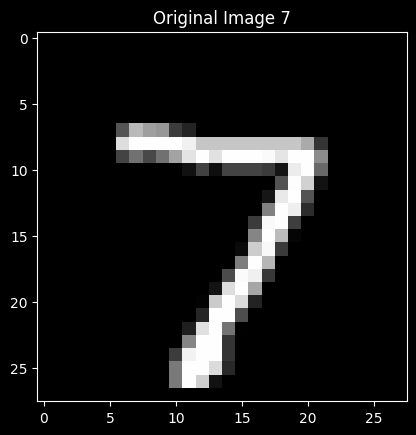

In [11]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Original Image {y_test[0]}")
plt.show()

In [12]:
X_testn = norm_l(X_test[0])
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predictions = 
 [[6.4385719e-12 1.7987848e-07 3.0806319e-10 2.7557246e-05 6.3666789e-07
  1.9797699e-14 0.0000000e+00 9.9968016e-01 4.0587374e-11 2.9145626e-04]]
